In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil, time

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [15]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/all_targets/LPR


In [16]:
# mac - phase I && II - LPR - devel
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/wide/devel/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_wide_t0_t239_devel_414.csv'

# constance
#complete_file_path = '/people/kimd999/tox/phase_I_II_close_file_frequently/data/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_wide_t0_t239_full.csv'

lpr_all_data = pd.read_csv(complete_file_path, header = 0)

In [45]:
display(lpr_all_data.head())
#display("lpr_all_data.shape:" + str(lpr_all_data.shape))

# Convert plate ids to ints
lpr_all_data['plate.id'] = (lpr_all_data['plate.id'].values).astype(int)
display(lpr_all_data)
display(len(lpr_all_data))

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,Chemical_Plate_WELL
0,414,10184,A01,414_10184.0_A01,50.0,6.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,1.8,0.0,0.0,0.0,1.1,0.6,0.0,0.4,2.2,0.0,0.0,0.0,NaN,10.1,0.0,7.0,0.7,6.4,9.7,5.3,7.7,0.0,4.7,0.1,0.0,0.0,3.5,6.6,0.0,7.0,3.2,6.5,0.0,5.8,2.7,9.6,4.0,0.0,0.0,2.3,0.0,10.7,0.0,3.0,0.0,6.9,0.0,1.4,0.0,0.3,9.7,0.0,0.0,0.3,0.0,1.4,6.6,0.0,0.0,0.0,4.5,0.0,NaN,0.0,0.0,1.7,10.3,0.0,0.0,2.9,0.0,0.0,0.0,10.0,27.2,0.0,0.0,0.0,1.4,2.4,1.3,5.8,3.5,2.2,0.0,20.9,10.4,13.4,11.6,NaN,4.8,8.9,2.5,25.8,29.3,NaN,5.0,1.8,15.8,0.0,13.2,27.8,21.5,0.0,NaN,0.0,3.1,16.3,8.8,NaN,16.5,13.1,1.3,0.0,NaN,0.0,0.0,0.0,0.0,3.7,0.0,0.0,0.0,0.3,0.5,0.0,0.0,0.0,0.0,7.4,11.0,0.0,1.1,0.0,0.0,6.0,2.2,NaN,0.0,0.0,0.0,NaN,0.0,2.9,14.0,10.6,0.0,10.9,11.3,3.2,NaN,20.1,3.2,0.0,4.9,1.7,0.0,0.0,4.0,NaN,8.8,1.8,0.0,4.6,14.4,3.8,1.4,3.8,0.0,0.0,0.5,12.4,18.2,22.9,21.4,11.7,0.0,0.0,2.9,0.0,0.7,0.5,0.0,1.1,4.2,0.0,0.0,0.0,3.5,12.3,NaN,7.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.3,2.0,0.0,0.0,0.0,414_10184_A01
1,414,10184,A02,414_10184.0_A02,35.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,2.9,0.3,0.0,0.0,0.0,1.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.1,2.8,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,7.1,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,43.3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,39.7,2.5,0.0,0.0,0.0,1.7,19.1,NaN,0.0,0.0,0.0,0.0,8.1,24.7,12.8,0.0,14.4,25.0,25.1,46.5,10.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,29.9,0.4,0.0,0.0,2.4,0.0,414_10184_A02
2,414,10184,A03,414_10184.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.3,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,28.3,0.0,0.0,0.0,0.0,2.8,28.1,25.9,25.1,12.1,0.0,0.0,0.0,0.0,18.3,21.4,19.2,23.7,6.7,0.0,11.6,19.7,14.6,26.2,23.8,0.7,1.9,3.0,0.0,0.0,4.1,0.9,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.4,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.6,24.5,18.7,16.4,0.0,0.5,0.0,0.0,0.0,0.0,0.0,12.1,21.3,0.0,0.0,NaN,8.1,15.3,0.0,0.0,18.5,NaN,26.3,21.6,22.0,0.0,0.0,11.1,17.4,14.7,NaN,22.7,27.2,14.3,5.4,NaN,0.2,0.0,0.0,0.0,NaN,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.7,5.1,2.6,0.0,0.5,0.0,0.0,0.0,NaN,0.0,0.0,28.7,NaN,8.6,18.7,23.4,14.2,5.5,24.1,21.1,16.1,NaN,10.6,18.7,35.9,16.9,18.7,12.5,18.2,19.3,NaN,23.9,13.0,20.1,0.0,20.7,21.7,29.2,18.0,16.2,19.6,19.6,26.3,21.2,28.0,5.5,0.4,0.0,0.0,0.0,0.0,4.7,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,Chemical_Plate_WELL
0,414,10184,A01,414_10184.0_A01,50.0,6.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,1.8,0.0,0.0,0.0,1.1,0.6,0.0,0.4,2.2,0.0,0.0,0.0,NaN,10.1,0.0,7.0,0.7,6.4,9.7,5.3,7.7,0.0,4.7,0.1,0.0,0.0,3.5,6.6,0.0,7.0,3.2,6.5,0.0,5.8,2.7,9.6,4.0,0.0,0.0,2.3,0.0,10.7,0.0,3.0,0.0,6.9,0.0,1.4,0.0,0.3,9.7,0.0,0.0,0.3,0.0,1.4,6.6,0.0,0.0,0.0,4.5,0.0,NaN,0.0,0.0,1.7,10.3,0.0,0.0,2.9,0.0,0.0,0.0,10.0,27.2,0.0,0.0,0.0,1.4,2.4,1.3,5.8,3.5,2.2,0.0,20.9,10.4,13.4,11.6,NaN,4.8,8.9,2.5,25.8,29.3,NaN,5.0,1.8,15.8,0.0,13.2,27.8,21.5,0.0,NaN,0.0,3.1,16.3,8.8,NaN,16.5,13.1,1.3,0.0,NaN,0.0,0.0,0.0,0.0,3.7,0.0,0.0,0.0,0.3,0.5,0.0,0.0,0.0,0.0,7.4,11.0,0.0,1.1,0.0,0.0,6.0,2.2,NaN,0.0,0.0,0.0,NaN,0.0,2.9,14.0,10.6,0.0,10.9,11.3,3.2,NaN,20.1,3.2,0.0,4.9,1.7,0.0,0.0,4.0,NaN,8.8,1.8,0.0,4.6,14.4,3.8,1.4,3.8,0.0,0.0,0.5,12.4,18.2,22.9,21.4,11.7,0.0,0.0,2.9,0.0,0.7,0.5,0.0,1.1,4.2,0.0,0.0,0.0,3.5,12.3,NaN,7.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.3,2.0,0.0,0.0,0.0,414_10184_A01
1,414,10184,A02,414_10184.0_A02,35.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,2.9,0.3,0.0,0.0,0.0,1.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.1,2.8,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,7.1,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,43.3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,39.7,2.5,0.0,0.0,0.0,1.7,19.1,NaN,0.0,0.0,0.0,0.0,8.1,24.7,12.8,0.0,14.4,25.0,25.1,46.5,10.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,29.9,0.4,0.0,0.0,2.4,0.0,414_10184_A02
2,414,10184,A03,414_10184.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.3,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,28.3,0.0,0.0,0.0,0.0,2.8,28.1,25.9,25.1,12.1,0.0,0.0,0.0,0.0,18.3,21.4,19.2,23.7,6.7,0.0,11.6,19.7,14.6,26.2,23.8,0.7,1.9,3.0,0.0,0.0,4.1,0.9,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.4,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.6,24.5,18.7,16.4,0.0,0.5,0.0,0.0,0.0,0.0,0.0,12.1,21.3,0.0,0.0,NaN,8.1,15.3,0.0,0.0,18.5,NaN,26.3,21.6,22.0,0.0,0.0,11.1,17.4,14.7,NaN,22.7,27.2,14.3,5.4,NaN,0.2,0.0,0.0,0.0,NaN,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.7,5.1,2.6,0.0,0.5,0.0,0.0,0.0,NaN,0.0,0.0,28.7,NaN,8.6,18.7,23.4,14.2,5.5,24.1,21.1,16.1,NaN,10.6,18.7,35.9,16.9,18.7,12.5,18.2,19.3,NaN,23.9,13.0,20.1,0.0,20.7,21.7,29.2,18.0,16.2,19.6,19.6,26.3,21.2,28.0,5.5,0.4,0.0,0.0,0.0,0.0,4.7,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

192

In [18]:
unique_chemical_IDs = np.unique(lpr_all_data['chemical.id'])
count_wells_compounds_concentration = pd.DataFrame(columns = ['Compound', 'Concentration', 'Number_Wells'])

# Count number of wells for each chemical
for chemical_ID in unique_chemical_IDs:
    lpr_data_subset = lpr_all_data.loc[lpr_all_data['chemical.id'] == chemical_ID]
    print('\nPlates/Wells/Concentration information about compound:', chemical_ID)
    print('Plate IDs:', np.unique(lpr_data_subset['plate.id']))
    print('Number of unique plates:', len(np.unique(lpr_data_subset['plate.id'])))
    print('Concentrations tested:', np.unique(lpr_data_subset['conc']))
    print('Number of concentrations:', len(np.unique(lpr_data_subset['conc'])))
    print('Total number of wells:', lpr_data_subset.shape[0])
    for concentration_id in np.unique(lpr_data_subset['conc']):
        lpr_data_subset_concs = lpr_data_subset.loc[lpr_data_subset['conc'] == concentration_id]
        #print('Number of wells for compound ID', chemical_ID, 'and concentration', concentration_id, 'are', len((lpr_data_subset_concs['well'])))
        count_wells_compounds_concentration = count_wells_compounds_concentration.append({'Compound': chemical_ID, 'Concentration': concentration_id, 'Number_Wells': len((lpr_data_subset_concs['well']))}, ignore_index = True)


Plates/Wells/Concentration information about compound: 414
Plate IDs: [10184 10188]
Number of unique plates: 2
Concentrations tested: [ 0.   1.   5.  11.2 35.6 50. ]
Number of concentrations: 6
Total number of wells: 192


## Load morphological data for filtering wells that have dead fish

In [44]:
#mac - phase I && II - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/Phase_I_II/input/morpho/wide/zf_morphology_data_335_chemicals_2020DEC16_wide_DNC_0.csv'

#constance - phase I && II - full
#morph_data_file_complete_path = '/people/kimd999/tox/phase_I_II_close_file_frequently/input/wide/zf_morphology_data_335_chemicals_2020DEC16_wide_DNC_0.csv'

morphology_all_data = pd.read_csv(morph_data_file_complete_path, header = 0)
display(morphology_all_data.head(6))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,DP24,EYE_,JAW_,MO24,MORT,NC24,NC__,OTIC,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,53,9289,A06,53_9289_A06,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Goal of this box 
# -> (in lpr_all_data) leave only rows with non 1 and NA MORT

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data
lpr_all_data['Chemical_Plate_WELL'] = lpr_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
morphology_all_data['Chemical_Plate_WELL'] = morphology_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

morphology_nonna_data_plate_well = morphology_all_data.Chemical_Plate_WELL[~((morphology_all_data.MORT == 1) | (morphology_all_data.MORT.isnull()))]
lpr_filtered_data = lpr_all_data.loc[lpr_all_data['Chemical_Plate_WELL'].isin(list(morphology_nonna_data_plate_well.values))]

print("morphology_all_data.shape:" + str(morphology_all_data.shape))
print("morphology_nonna_data_plate_well.shape:" + str(morphology_nonna_data_plate_well.shape))

print("\nlpr_all_data.shape:" + str(lpr_all_data.shape))
print("lpr_filtered_data.shape:"+str(lpr_filtered_data.shape) + "\n")

display(morphology_nonna_data_plate_well[0:5])
print ("\n")
display(lpr_all_data.Chemical_Plate_WELL[0:5])

morphology_all_data.shape:(43483, 29)
morphology_nonna_data_plate_well.shape:(35765,)

lpr_all_data.shape:(192, 234)
lpr_filtered_data.shape:(181, 234)



1    53_9289_A02
2    53_9289_A03
3    53_9289_A04
4    53_9289_A05
6    53_9289_A07
Name: Chemical_Plate_WELL, dtype: object

0    414_10184_A01
1    414_10184_A02
2    414_10184_A03
3    414_10184_A04
4    414_10184_A05
Name: Chemical_Plate_WELL, dtype: object

In [47]:
lpr_filtered_data.head()
display(len(lpr_filtered_data))
lpr_filtered_data.to_csv("lpr_filtered_data.csv",index=False)

181

In [65]:
# Convert time resolution to minutes (if applicable)
# for LPR, 240 variables -> 24 variables

# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields
lpr_filtered_data_in_minute = lpr_filtered_data[['chemical.id', 'conc', 'plate.id', 'well']]
print ("(before transforming for 1 minute interval) lpr_filtered_data_in_minute.shape:\n" + str(lpr_filtered_data_in_minute.shape)) # for lpr -> (1527, 4)
#lpr_filtered_data_in_minute.head()


time_index_sec_start = 5
max_time_index_sec = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)
    
for time_index in range(int(max_time_index_sec / group_size)):
    if (report):
        print ("\ntime_index:" + str(time_index))
    
    start_index = time_index_sec_start + group_size * time_index
    if (report):
        print ("start_index:" + str(start_index))
    
    end_index = start_index + group_size
    if (report):
        print ("end_index:" + str(end_index))
    
    lpr_filtered_data_in_minutes_in_this_time_index = pd.DataFrame(np.sum(lpr_filtered_data.iloc[:,start_index:end_index], axis = 1))
    #if (report):
    #    print ("lpr_filtered_data_in_minutes_in_this_time_index.shape:\n" + str(lpr_filtered_data_in_minutes_in_this_time_index.shape))
    #    display(lpr_filtered_data_in_minutes_in_this_time_index.head())
    #    display(lpr_filtered_data_in_minutes_in_this_time_index.tail())
    
    lpr_filtered_data_in_minutes_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    lpr_filtered_data_in_minute = pd.concat([lpr_filtered_data_in_minute, lpr_filtered_data_in_minutes_in_this_time_index], axis = 1)
pd.set_option('display.max_columns', None)
print ("(after transforming for 1 minute interval) lpr_filtered_data_in_minute.shape:\n" + str(lpr_filtered_data_in_minute.shape)) # for lpr -> (1527, 28)
#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

lpr_filtered_data_in_minute['chemical_conc'] = lpr_filtered_data_in_minute[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#lpr_filtered_data_in_minute.head(6)
display(len(lpr_filtered_data_in_minute))
lpr_filtered_data_in_minute.to_csv("lpr_filtered_data_in_minute.csv",index=False)

(before transforming for 1 minute interval) lpr_filtered_data_in_minute.shape:
(181, 4)
interval:1 min
(after transforming for 1 minute interval) lpr_filtered_data_in_minute.shape:
(181, 28)


181

In [66]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

'(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239'

lpr_filtered_data_in_minute.shape:(181, 29)
     t0   t1   t2    t3    t4   t5    t6   t7   t8    t9   t10   t11   t12  \
11  0.0  0.0  0.0  16.3  39.0  9.3  15.4  5.4  0.0  48.8  45.9  44.2  48.6   

    t13  t14   t15   t16   t17    t18   t19  t20  t21   t22  t23  
11  0.0  4.5  43.5  72.2  97.8  119.5  34.7  0.0  1.7  43.9  0.0  


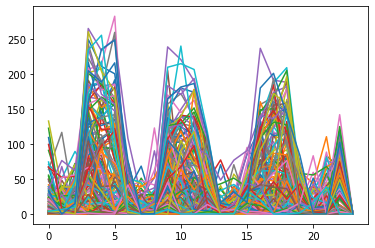

In [67]:
#''' # keep for checking
# Plot few lpr curves to check transition points
# Plotting to make sure that data makes sense
time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

print ("lpr_filtered_data_in_minute.shape:" + str(lpr_filtered_data_in_minute.shape))
# (181, 29)

fig, ax = plt.subplots()

print (lpr_filtered_data_in_minute.iloc[10:11, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(lpr_filtered_data_in_minute.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
#'''

lpr_filtered_data_in_minute_0_conc.shape:(30, 29)


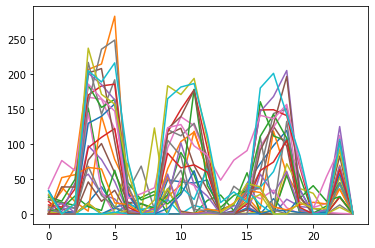

In [76]:
#print (lpr_filtered_data_in_minute['conc'])

lpr_filtered_data_in_minute_0_conc = lpr_filtered_data_in_minute.loc[lpr_filtered_data_in_minute['conc'] == 0]

lpr_filtered_data_in_minute_0_conc.head()
#print ("lpr_filtered_data_in_minute_0_conc.shape:" + str(lpr_filtered_data_in_minute_0_conc.shape))

#''' # keep for checking
# Plot few lpr curves to check transition points
# Plotting to make sure that data makes sense
time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

print ("lpr_filtered_data_in_minute_0_conc.shape:" + str(lpr_filtered_data_in_minute_0_conc.shape))


fig, ax = plt.subplots()

#print (lpr_filtered_data_in_minute_0_conc.iloc[:11, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(lpr_filtered_data_in_minute_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
#'''

In [23]:
delta_mov_auc = lpr_filtered_data_in_minute[['chemical.id', 'conc', 'plate.id', 'well']].copy()

transition_points = [2,8,14,20]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_mov_auc['MOV' + str(transition_index + 1)] \
            = lpr_filtered_data_in_minute['t' + str(transition_point + 1)] \
            - lpr_filtered_data_in_minute['t' + str(transition_point)]
        else:
            delta_mov_auc['AUC' + str(transition_index + 1)] \
            = sum(lpr_filtered_data_in_minute['t' + str(transition_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_filtered_data_in_minute['t' + str(transition_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta_mov_auc.head())
delta_mov_auc.to_csv("delta_mov_auc.csv", index=False)


transition_index:0
transition_point:2

transition_index:1
transition_point:8

transition_index:2
transition_point:14

transition_index:3
transition_point:20


,chemical.id,conc,plate.id,well,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3,MOV4,AUC4
0,414,50.0,10184,A01,42.6,99.6,33.2,196.0,-9.9,3.2,-28.8,-135.7
1,414,35.6,10184,A02,-0.6,4.1,-3.9,32.8,43.3,99.2,6.2,-128.5
2,414,11.2,10184,A03,100.9,302.0,90.7,236.1,20.2,236.5,0.0,-254.7
3,414,5.0,10184,A04,66.9,-119.5,68.7,233.0,28.8,66.8,0.0,-88.7
4,414,1.0,10184,A05,17.7,67.7,42.4,41.6,26.3,-20.1,-14.5,-52.0


In [24]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head())


transition_index:0
transition_point:2
name:MOV1_MOV2
name:MOV1_MOV3
name:MOV1_MOV4
name:AUC1_AUC2
name:AUC1_AUC3
name:AUC1_AUC4

transition_index:1
transition_point:8
name:MOV2_MOV3
name:MOV2_MOV4
name:AUC2_AUC3
name:AUC2_AUC4

transition_index:2
transition_point:14
name:MOV3_MOV4
name:AUC3_AUC4

transition_index:3
transition_point:20


,chemical.id,conc,plate.id,well,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3,MOV4,AUC4,MOV1_MOV2,MOV1_MOV3,MOV1_MOV4,AUC1_AUC2,AUC1_AUC3,AUC1_AUC4,MOV2_MOV3,MOV2_MOV4,AUC2_AUC3,AUC2_AUC4,MOV3_MOV4,AUC3_AUC4
0,414,50.0,10184,A01,42.6,99.6,33.2,196.0,-9.9,3.2,-28.8,-135.7,9.4,52.5,71.4,-96.4,96.4,235.3,43.1,62.0,192.8,331.7,18.9,138.9
1,414,35.6,10184,A02,-0.6,4.1,-3.9,32.8,43.3,99.2,6.2,-128.5,3.3,-43.9,-6.8,-28.7,-95.1,132.6,-47.2,-10.1,-66.4,161.3,37.1,227.7
2,414,11.2,10184,A03,100.9,302.0,90.7,236.1,20.2,236.5,0.0,-254.7,10.2,80.7,100.9,65.9,65.5,556.7,70.5,90.7,-0.4,490.8,20.2,491.2
3,414,5.0,10184,A04,66.9,-119.5,68.7,233.0,28.8,66.8,0.0,-88.7,-1.8,38.1,66.9,-352.5,-186.3,-30.8,39.9,68.7,166.2,321.7,28.8,155.5
4,414,1.0,10184,A05,17.7,67.7,42.4,41.6,26.3,-20.1,-14.5,-52.0,-24.7,-8.6,32.2,26.1,87.8,119.7,16.1,56.9,61.7,93.6,40.8,31.9


In [25]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

'delta_mov_auc_final.head():'

,AUC_all_,MOV_all_,chemical.id,conc,plate.id,well,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3,MOV4,AUC4,MOV1_MOV2,MOV1_MOV3,MOV1_MOV4,AUC1_AUC2,AUC1_AUC3,AUC1_AUC4,MOV2_MOV3,MOV2_MOV4,AUC2_AUC3,AUC2_AUC4,MOV3_MOV4,AUC3_AUC4
0,1156.0,257.3,414,50.0,10184,A01,42.6,99.6,33.2,196.0,-9.9,3.2,-28.8,-135.7,9.4,52.5,71.4,-96.4,96.4,235.3,43.1,62.0,192.8,331.7,18.9,138.9
1,263.8,-67.6,414,35.6,10184,A02,-0.6,4.1,-3.9,32.8,43.3,99.2,6.2,-128.5,3.3,-43.9,-6.8,-28.7,-95.1,132.6,-47.2,-10.1,-66.4,161.3,37.1,227.7
2,2042.9,373.2,414,11.2,10184,A03,100.9,302.0,90.7,236.1,20.2,236.5,0.0,-254.7,10.2,80.7,100.9,65.9,65.5,556.7,70.5,90.7,-0.4,490.8,20.2,491.2
3,314.4,240.6,414,5.0,10184,A04,66.9,-119.5,68.7,233.0,28.8,66.8,0.0,-88.7,-1.8,38.1,66.9,-352.5,-186.3,-30.8,39.9,68.7,166.2,321.7,28.8,155.5
4,533.5,112.7,414,1.0,10184,A05,17.7,67.7,42.4,41.6,26.3,-20.1,-14.5,-52.0,-24.7,-8.6,32.2,26.1,87.8,119.7,16.1,56.9,61.7,93.6,40.8,31.9


In [26]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

,Chemical.ID,CONC,Plate,WELL,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3,MOV4,AUC4
0,414,50.0,10184,A01,42.6,99.6,33.2,196.0,-9.9,3.2,-28.8,-135.7
1,414,35.6,10184,A02,-0.6,4.1,-3.9,32.8,43.3,99.2,6.2,-128.5
2,414,11.2,10184,A03,100.9,302.0,90.7,236.1,20.2,236.5,0.0,-254.7
3,414,5.0,10184,A04,66.9,-119.5,68.7,233.0,28.8,66.8,0.0,-88.7
4,414,1.0,10184,A05,17.7,67.7,42.4,41.6,26.3,-20.1,-14.5,-52.0


In [27]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [28]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
else:
    chemical_id_from_here = [53]

if (full_devel == "full"):
    end_points_from_here = ['MOV1','AUC1']
else:
    end_points_from_here = ['MOV1']
    #end_points_from_here = ['MOV1_2_3']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()

BMD_may_need_to_be_calculated_by_new_rescue_method:False
BMD_may_need_to_be_calculated_by_new_rescue_method:False
Done, it took:86.8 seconds
